In [40]:
# performing linear algebra
import numpy as np 
  
# data processing
import pandas as pd
  
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
df = pd.read_csv("/content/drive/MyDrive/Projects/IBM-HR-Employee-Attrition.csv")
# dataset = pd.read_csv("/content/drive/MyDrive/Projects/IBM-HR-Employee-Attrition.csv")
# df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


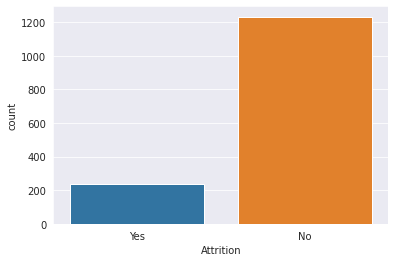

In [64]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

#Feature Engineering and Selection

In [120]:
#droping irrelevant columns
df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber', 'Over18'] , inplace=True)
#converting target variable
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

#Label encoding
preserved_mapper = {'Travel_Frequently':2 , 'Travel_Rarely': 1, 'Non-Travel': 0}
df = df.replace(preserved_mapper)


In [121]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


##Adjusting skewness and outliers

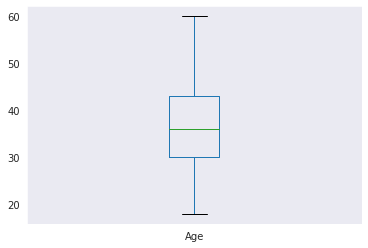

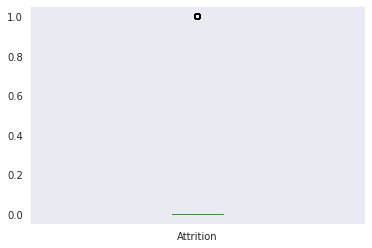

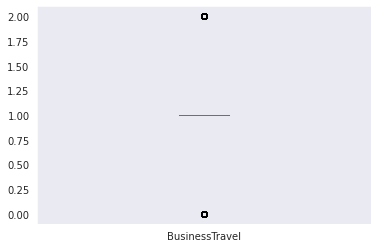

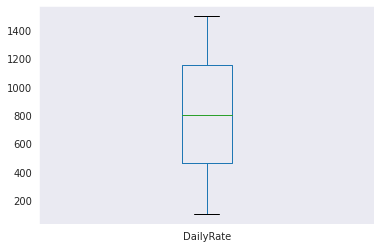

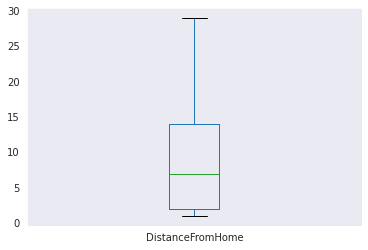

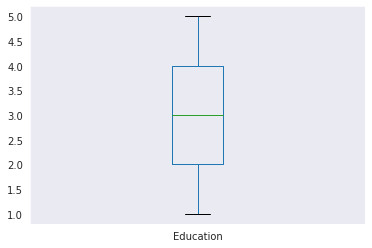

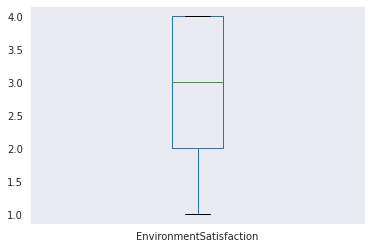

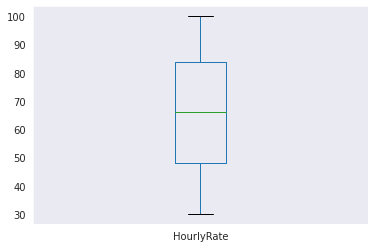

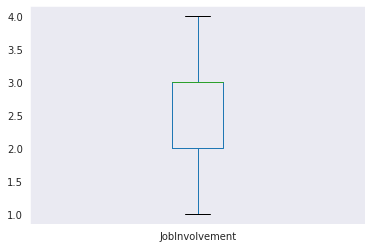

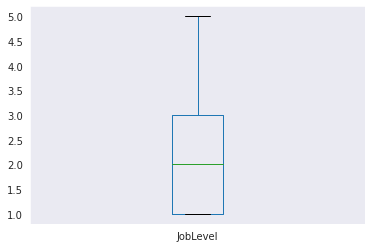

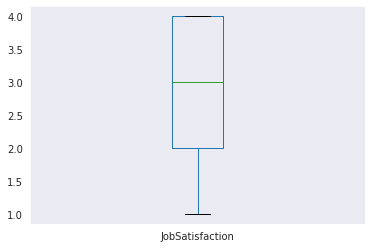

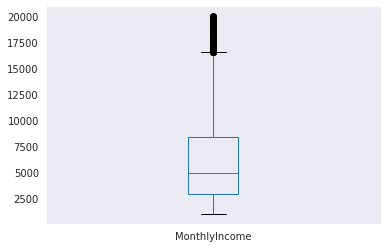

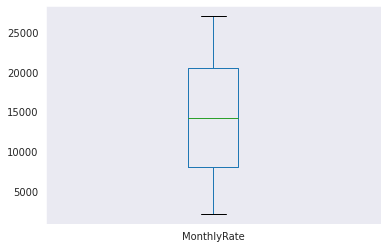

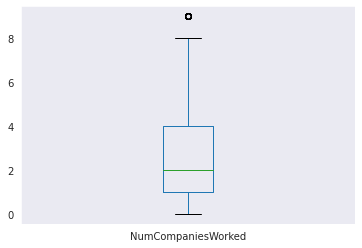

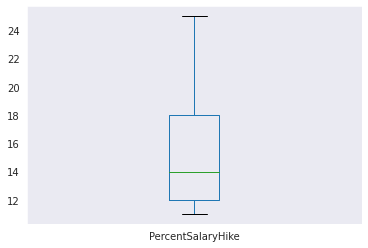

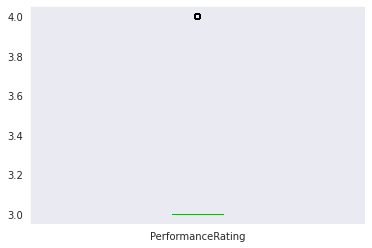

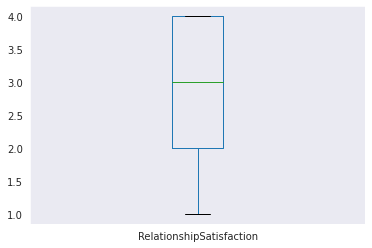

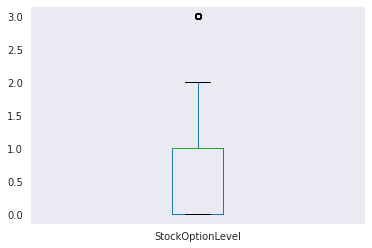

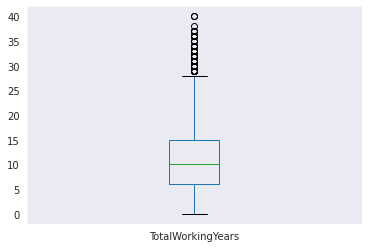

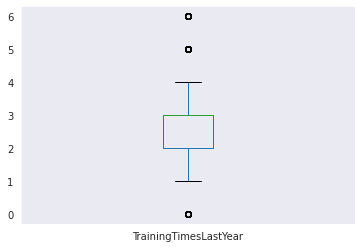

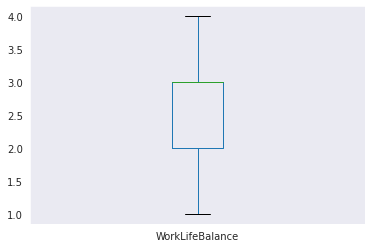

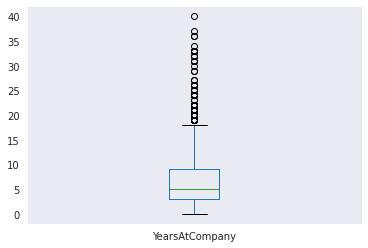

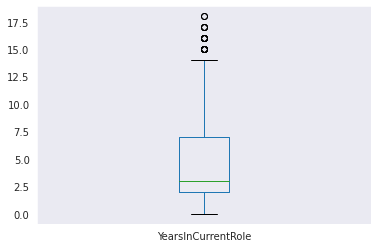

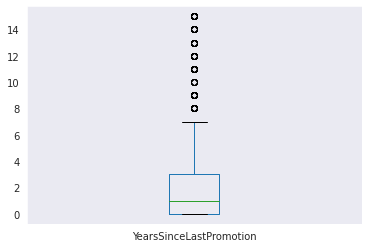

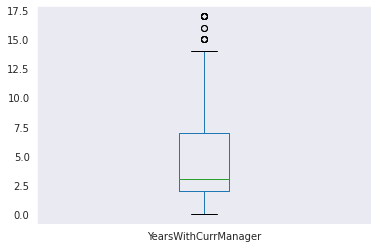

In [122]:
#checking outliers
int_cols = df.select_dtypes(include='int64').columns
for col in int_cols :
    df.boxplot(column =col,grid = False)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



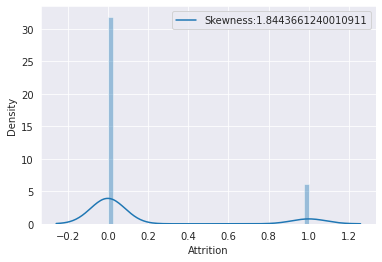

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



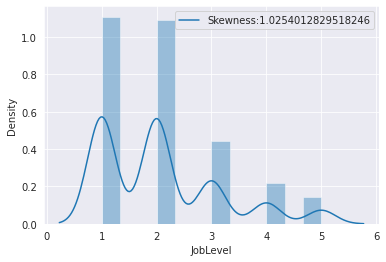

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



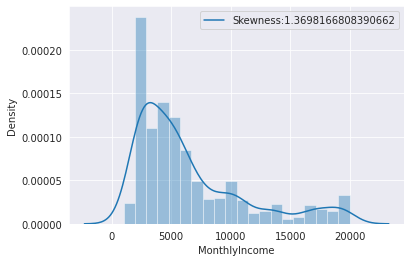

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



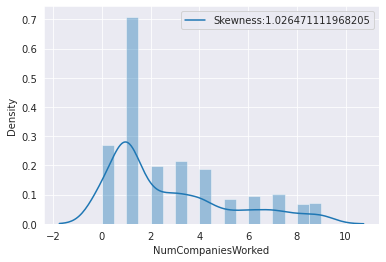

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



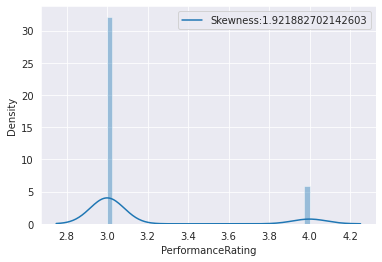

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



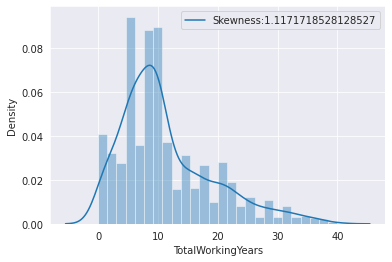

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



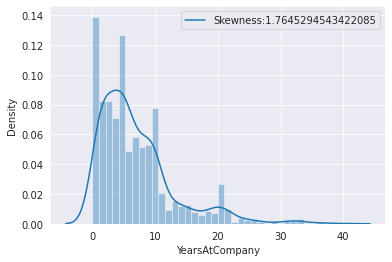

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



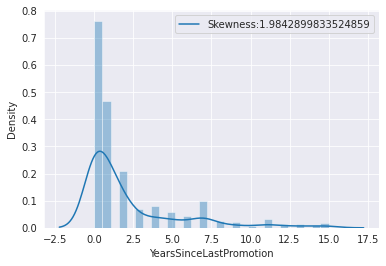

Symmetric Features are: Age, BusinessTravel, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, MonthlyRate, PercentSalaryHike, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, YearsInCurrentRole, YearsWithCurrManager, 

In [123]:
#checking skewness
int_data = df[int_cols]
sym_feat = []
for col in int_cols:
  skewness = df[col].skew()
  if abs(skewness)>1:  
    sns.distplot(df[col])
    skew = 'Skewness:' + str(skewness)
    plt.legend([skew])
    plt.show()
  else:
    sym_feat.append(col)

print('Symmetric Features are:', end=' ')
for f in sym_feat:
  print(f, end=', ')

  #print('Skewness for', col, 'is:',df[col].skew(),'\n')

In [124]:
#applying transformations on skewed features
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
df['TotalWorkingYears'] = np.sqrt(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.sqrt(df['YearsAtCompany'])
df['YearsSinceLastPromotion'] = np.power(df['YearsSinceLastPromotion'],1/3)

##Checking for redundant features

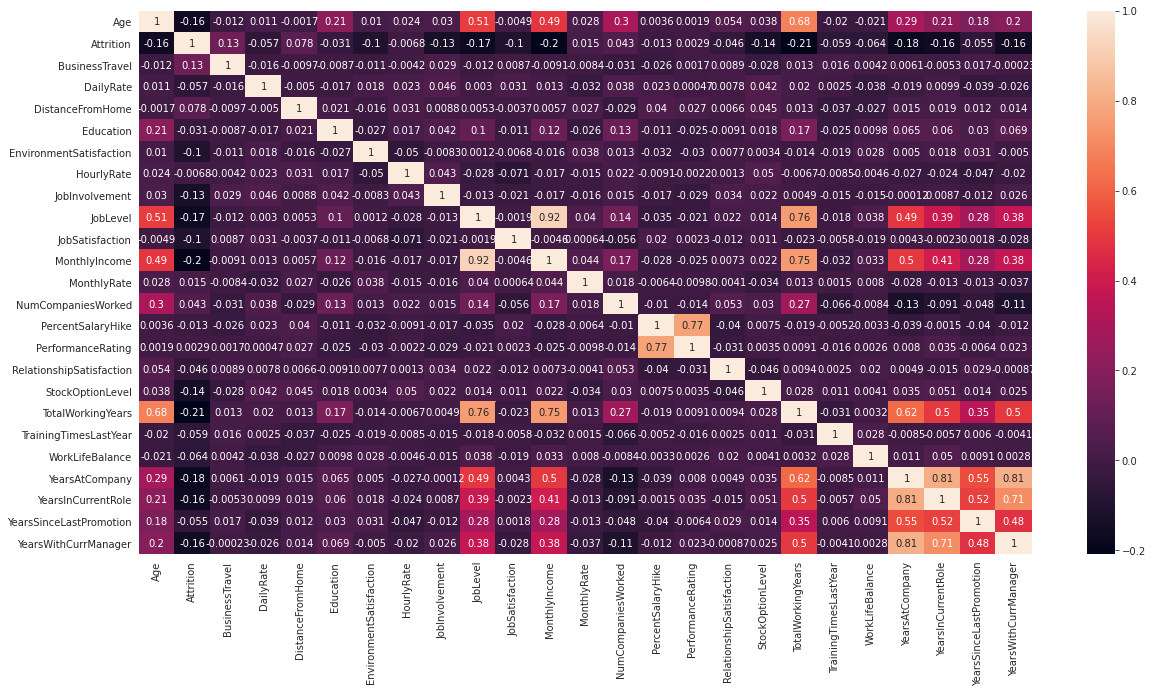

In [125]:
#plotting covariance matrix to check for redundant variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [126]:
import plotly.offline as py
import plotly.figure_factory as ff
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [127]:
def plot_distribution(var_select, bin_size): 
# Calculate the correlation coefficient between the new variable and the target
  corr = df['Attrition'].corr(df[var_select])
  corr = np.round(corr,3)
  tmp1 = attrition[var_select]
  tmp2 = no_attrition[var_select]
  hist_data = [tmp1, tmp2]
  
  group_labels = ['Yes_attrition', 'No_attrition']
  colors = ['#FFD700', '#7EC0EE']

  fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
  
  fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

  py.iplot(fig, filename = 'Density plot')

plot_distribution('PerformanceRating', 100)

In [128]:
df.drop(columns=[ 'JobLevel','PerformanceRating'] , inplace=True)

In [129]:
#Checking the updated skewness after transformations
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              0.082428
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.198634
YearsWithCurrManager        0.833451
dtype: float64

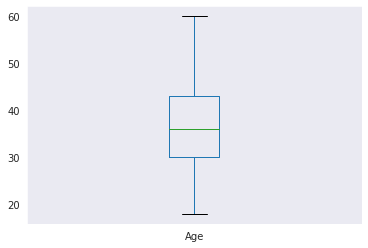

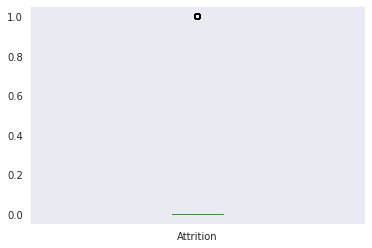

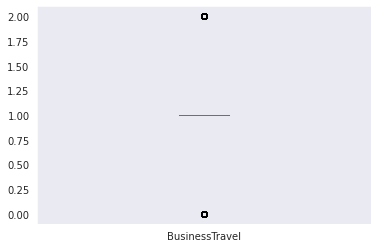

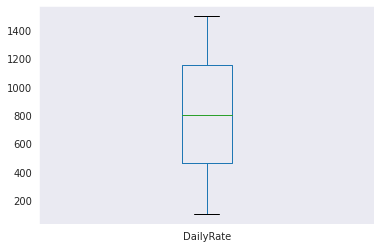

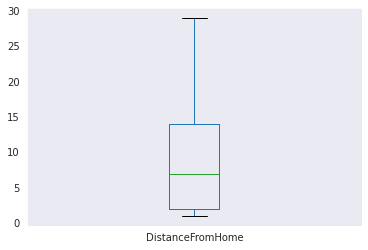

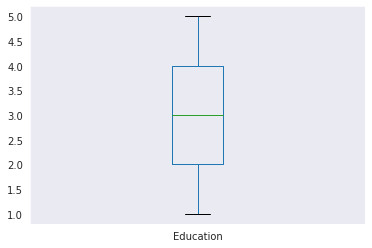

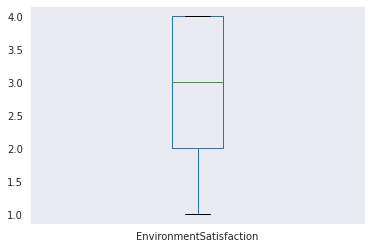

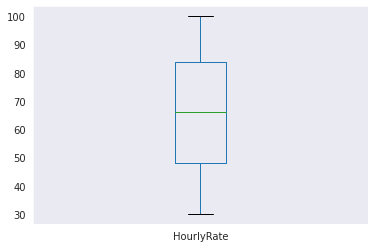

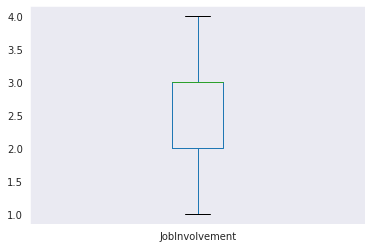

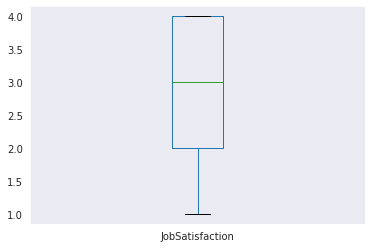

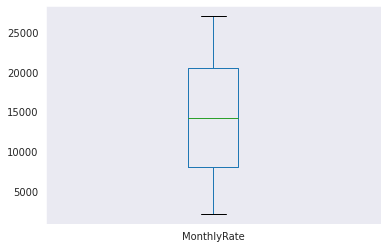

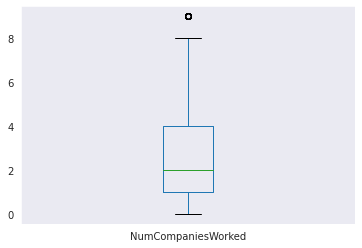

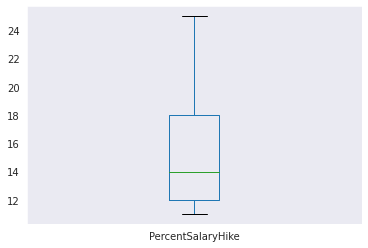

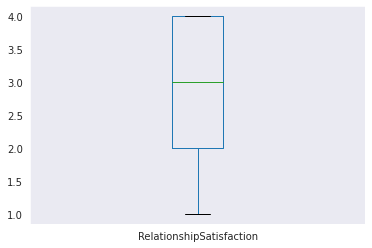

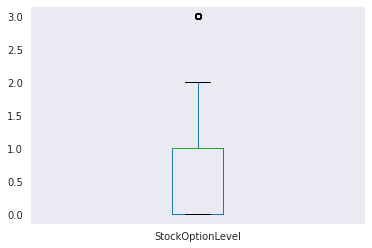

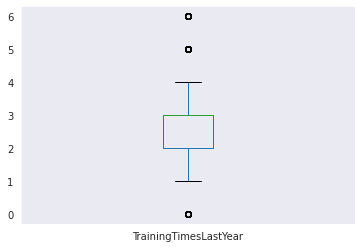

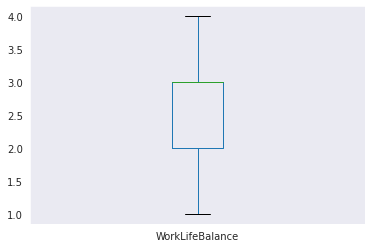

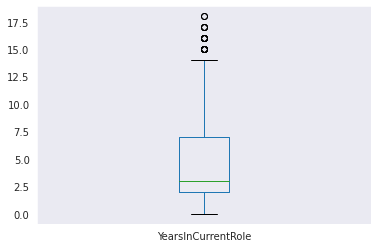

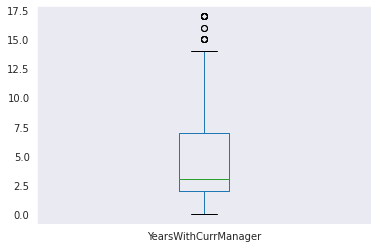

In [130]:
#checking outliers again
int_cols = df.select_dtypes(include='int64').columns
for col in int_cols :
    df.boxplot(column =col,grid = False)
    plt.show()

In [131]:
a =df[df['Department']=='Sales'].MonthlyIncome.mean()
b = df[df['Department']=='Sales'].PercentSalaryHike.mean()
print('Sales Department')
print('Monthly Income Mean: {0}, Percent Salary Hike mean : {1}'.format(a,b))

Sales Department
Monthly Income Mean: 8.688052811841649, Percent Salary Hike mean : 15.096412556053812


In [132]:
a = df[df['Department']=='Research & Development'].MonthlyIncome.mean()
b =df[df['Department']=='Research & Development'].PercentSalaryHike.mean()
print('R&D Department')
print('Monthly Income Mean: {0}, Percent Salary Hike mean : {1}'.format(a,b))

R&D Department
Monthly Income Mean: 8.49370455073132, Percent Salary Hike mean : 15.291363163371487


In [133]:
a = df[df['Department']=='Human Resources'].MonthlyIncome.mean()
b = df[df['Department']=='Human Resources'].PercentSalaryHike.mean()
print('HR Department')
print('Monthly Income Mean: {0}, Percent Salary Hike mean : {1}'.format(a,b))

HR Department
Monthly Income Mean: 8.490090813128145, Percent Salary Hike mean : 14.761904761904763


In [134]:
df.MonthlyIncome.mean()

8.552515203102889

## OneHot Encoding

In [135]:
y = df['Attrition']
# X = df.drop(columns='Attrition')

dataset = df
dum_Department = pd.get_dummies(dataset['Department'], prefix ='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'], prefix ='EducationField')
dum_Gender = pd.get_dummies(dataset['Gender'], prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'], prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'], prefix ='OverTime', drop_first = True)

dataset = df[int_cols]
X_int = dataset.drop('Attrition', axis=1) # training features
Y = dataset.Attrition # target feature

# Adding these dummy variable to input X
X = pd.concat([X_int, dum_Department, dum_EducationField, dum_Gender, dum_JobRole, dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
#X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)
  
print(X.shape)
print(y.shape)

(1470, 41)
(1470,)


##Chi-Square test

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_int = scaler.fit_transform(X_int)

In [137]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2)
fit = test.fit(X, y)
fit.scores_

array([8.41552768e+01, 6.17712866e+00, 9.56580494e+02, 6.37721416e+01,
       5.20642224e-01, 6.89059434e+00, 4.31779090e-01, 4.60561607e+00,
       7.01194663e+00, 1.19663355e+03, 6.43865444e+00, 2.35026858e-01,
       1.33233286e+00, 2.52688260e+01, 3.08579616e+00, 1.08554296e+00,
       1.17522596e+02, 1.10671534e+02, 3.98626382e-01, 3.70291570e+00,
       6.69446524e+00, 1.91887761e+00, 9.24044433e-01, 4.07915378e+00,
       2.22213257e+00, 4.44605699e-01, 6.43586003e+00, 5.10086544e-01,
       8.29251836e+00, 1.85975262e+00, 1.16994947e+01, 9.49613598e+00,
       9.12658865e+00, 1.09780098e+01, 1.52305445e-04, 4.47333341e-01,
       3.42902680e+01, 8.79442184e+00, 6.59758576e+00, 3.07716690e+01,
       6.38450667e+01])

In [138]:
chai2,p=chi2(X,y)
stats = pd.DataFrame(list(zip(list(X.columns),chai2,p)),columns=['feature','chi2','p-value'])
stats.sort_values(by=['p-value'])

,feature,chi2,p-value
9,MonthlyRate,1196.633553,3.287933e-262
2,DailyRate,956.580494,4.923924e-210
16,YearsInCurrentRole,117.522596,2.205728e-27
17,YearsWithCurrManager,110.671534,6.983363e-26
0,Age,84.155277,4.574015e-20
40,OverTime_Yes,63.845067,1.345990e-15
3,DistanceFromHome,63.772142,1.396748e-15
36,JobRole_Sales Representative,34.290268,4.747499e-09
39,MaritalStatus_Single,30.771669,2.902446e-08
13,StockOptionLevel,25.268826,4.987041e-07


#Model Fitting

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

### Without SMOTE

In [ ]:
# x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

# # Randomoversampler
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# # uvs = RandomUnderSampler(random_state=42)
# # x_train, y_train = uvs.fit_sample(x_train, y_train )

# ovs = RandomOverSampler(random_state=42)
# x_train, y_train = ovs.fit_sample(x_train, y_train )

In [139]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for train_index, test_index in split.split(X, y):
  x_train = X.loc[train_index]
  x_test = X.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

In [ ]:
# x_train, x_test, y_train, y_test = StratifiedShuffleSplit(X, y, test_size = 0.2, random_state = 40)

##Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print_score(lr, x_train, y_train, x_test, y_test, train = True)
print_score(lr, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       986
           1       0.82      0.45      0.58       190

    accuracy                           0.89      1176
   macro avg       0.86      0.71      0.76      1176
weighted avg       0.89      0.89      0.88      1176


Confusion Matrix: 
 [[967  19]
 [105  85]]

Average Accuracy: 	 0.8801
Accuracy SD: 		 0.0206
accuracy score: 0.8946

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.64      0.38      0.48        47

    accuracy                           0.87       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.87      0.85       294


Confusion Matrix: 
 [[237  10]
 [ 29  18]]

accuracy score: 0.867

##SVC

In [146]:
# classification
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

print_score(svc, x_train, y_train, x_test, y_test, train = True)
print_score(svc, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176


Confusion Matrix: 
 [[986   0]
 [190   0]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Average Accuracy: 	 0.8384
Accuracy SD: 		 0.0007
accuracy score: 0.8384

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


Confusion Matrix: 
 [[247   0]
 [ 47   0]]

accuracy score: 0.8401

-----------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=15, random_state=0)
rf.fit(x_train,y_train)
print_score(rf, x_train, y_train, x_test, y_test, train = True)
print_score(rf, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[986   0]
 [  0 190]]

Average Accuracy: 	 0.8529
Accuracy SD: 		 0.0155
accuracy score: 1.0000

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294


Confusion Matrix: 
 [[246   1]
 [ 41   6]]

accuracy score: 0.857

##Voting Classifier

In [148]:
from sklearn.ensemble import VotingClassifier
vf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svc', svc)],voting='hard')
vf.fit(x_train, y_train)
print_score(vf, x_train, y_train, x_test, y_test, train = True)
print_score(vf, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       986
           1       1.00      0.45      0.62       190

    accuracy                           0.91      1176
   macro avg       0.95      0.72      0.78      1176
weighted avg       0.92      0.91      0.90      1176


Confusion Matrix: 
 [[986   0]
 [105  85]]

Average Accuracy: 	 0.8529
Accuracy SD: 		 0.0103
accuracy score: 0.9107

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294


Confusion Matrix: 
 [[247   0]
 [ 42   5]]

accuracy score: 0.857

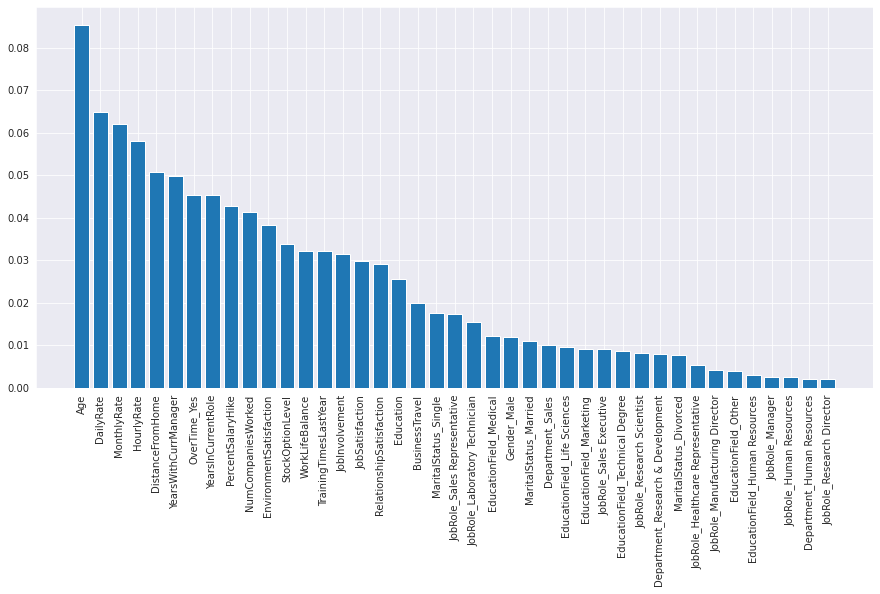

In [149]:
def fun(x):
  return x[1]
srt = list(zip(X.columns,rf.feature_importances_))
srt = sorted(srt, key = fun, reverse = True)

plt.figure(figsize = (15,7))
plt.bar(*zip(*srt))
plt.xticks(rotation = 90)
plt.show()

# After PCA

In [154]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [151]:
from sklearn.decomposition import PCA
pca= PCA(n_components=35)
X_pca=pca.fit_transform(X)

# Explained variance ratio
explained_variance = np.var(X_pca, axis=0)
evr= explained_variance/np.sum(explained_variance) *100
cevr=np.cumsum(evr)
cevr

array([ 99.67876965,  99.99878239,  99.99959524,  99.99976334,
        99.9998925 ,  99.99993375,  99.99996005,  99.99997062,
        99.99997787,  99.99998113,  99.99998353,  99.99998586,
        99.99998816,  99.99999011,  99.99999183,  99.99999308,
        99.99999407,  99.99999502,  99.99999572,  99.99999639,
        99.99999696,  99.99999743,  99.99999782,  99.99999817,
        99.99999845,  99.99999871,  99.99999893,  99.99999915,
        99.99999933,  99.99999949,  99.99999964,  99.99999976,
        99.99999987,  99.99999998, 100.        ])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 40)

##SVC

In [153]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

0.845108695652174


In [155]:
print_score(svc, X_train, y_train, X_test, y_test, train = True)
print_score(svc, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.00      0.00      0.00       180

    accuracy                           0.84      1102
   macro avg       0.42      0.50      0.46      1102
weighted avg       0.70      0.84      0.76      1102


Confusion Matrix: 
 [[922   0]
 [180   0]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Average Accuracy: 	 0.8367
Accuracy SD: 		 0.0006
accuracy score: 0.8367

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       311
           1       0.00      0.00      0.00        57

    accuracy                           0.85       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.85      0.77       368


Confusion Matrix: 
 [[311   0]
 [ 57   0]]

accuracy score: 0.8451

-----------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
#Fit the model to generate the data.
x_train, y_train = sm.fit_resample(x_train, y_train)
print(x_train.shape, y_train.shape)

In [157]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

0.845108695652174


In [158]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [159]:
print_score(svc, X_train, y_train, X_test, y_test, train = True)
print_score(svc, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.00      0.00      0.00       180

    accuracy                           0.84      1102
   macro avg       0.42      0.50      0.46      1102
weighted avg       0.70      0.84      0.76      1102


Confusion Matrix: 
 [[922   0]
 [180   0]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Average Accuracy: 	 0.8367
Accuracy SD: 		 0.0006
accuracy score: 0.8367

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       311
           1       0.00      0.00      0.00        57

    accuracy                           0.85       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.85      0.77       368


Confusion Matrix: 
 [[311   0]
 [ 57   0]]

accuracy score: 0.8451

-----------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [160]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [161]:
print_score(clf, X_train, y_train, X_test, y_test, train = True)
print_score(clf, X_train, y_train, X_test, y_test, train = False)

NameError: ignored

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

#KNN

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Projects/IBM-HR-Employee-Attrition.csv")
print (dataset.head)

FileNotFoundError: ignored

In [ ]:
# Importing file
from google.colab import files
data_upload = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
dataset = pd.read_csv('dataset.csv')
display(dataset)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


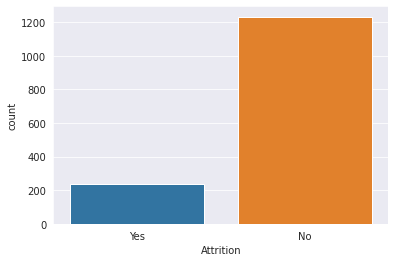

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = dataset)

In [ ]:
dataset.drop('EmployeeCount', axis = 1, inplace = True)
dataset.drop('StandardHours', axis = 1, inplace = True)
dataset.drop('EmployeeNumber', axis = 1, inplace = True)
dataset.drop('Over18', axis = 1, inplace = True)
print(dataset.shape)

(1470, 31)


In [ ]:
y = dataset.iloc[:, 1]
X = dataset
X.drop('Attrition', axis = 1, inplace = True)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], prefix ='BusinessTravel')
dum_Department = pd.get_dummies(dataset['Department'], prefix ='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'], prefix ='EducationField')
dum_Gender = pd.get_dummies(dataset['Gender'], prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'], prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'], prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department, dum_EducationField, dum_Gender, dum_JobRole, dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)
  
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

The optimal number of neighbors is  7 


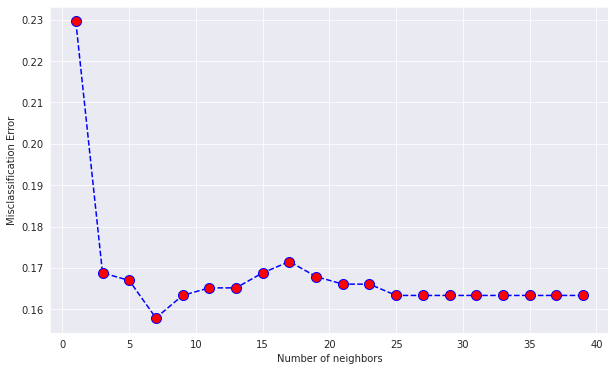

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neighbors = [] 
cv_scores = [] 
    
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 40, 2): 
  neighbors.append(k) 
  knn = KNeighborsClassifier(n_neighbors = k) 
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
  cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores] 
    
# determining the best k 
optimal_k = neighbors[error_rate.index(min(error_rate))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
    
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")
          
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       922
           1       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 [[915   7]
 [145  35]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matrix: 
 [[299  12]
 [ 55   2]]

accuracy score: 0.817